In [1]:
import warnings
import pandas as pd

In [2]:
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("./amazonDataset.csv",error_bad_lines=False)

In [4]:
dataset.head()

,product,title,rating,content
0,"100Pcs Disposable Face Masks, Black Face Mask,...",Do not purchase.,1.0,They smell horrible. I purchased them because ...
1,"100Pcs Disposable Face Masks, Black Face Mask,...",Smells bad,5.0,Smells weird !!
2,"100Pcs Disposable Face Masks, Black Face Mask,...",Worst quality I've ordered from Amazon,1.0,Ordered several different kind of masks I usua...
3,"100Pcs Disposable Face Masks, Black Face Mask,...","Finally, a 12 hour mask!",5.0,I’ve been struggling with wearing a mask throu...
4,"100Pcs Disposable Face Masks, Black Face Mask,...",I love this product,5.0,It very comfortable and light weight it's wort...


In [5]:
dataset.shape

(3270, 4)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  3270 non-null   object 
 1   title    3263 non-null   object 
 2   rating   3270 non-null   float64
 3   content  3245 non-null   object 
dtypes: float64(1), object(3)
memory usage: 102.3+ KB


In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,3270.0,3.333028,1.756893,1.0,1.0,4.0,5.0,5.0


In [8]:
##checking missing value in dataset
count = dataset.isnull().sum().sort_values(ascending=False)
percentage = ((dataset.isnull().sum()/len(dataset)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,
                        keys = ['Count','Percentage'])

print('Count and percentage of missing valuesfor the column:')
missing_data

Count and percentage of missing valuesfor the column:


,Count,Percentage
content,25,0.764526
title,7,0.214067
rating,0,0.000000
product,0,0.000000


In [9]:
dataset.dropna()

,product,title,rating,content
0,"100Pcs Disposable Face Masks, Black Face Mask,...",Do not purchase.,1.0,They smell horrible. I purchased them because ...
1,"100Pcs Disposable Face Masks, Black Face Mask,...",Smells bad,5.0,Smells weird !!
2,"100Pcs Disposable Face Masks, Black Face Mask,...",Worst quality I've ordered from Amazon,1.0,Ordered several different kind of masks I usua...
3,"100Pcs Disposable Face Masks, Black Face Mask,...","Finally, a 12 hour mask!",5.0,I’ve been struggling with wearing a mask throu...
4,"100Pcs Disposable Face Masks, Black Face Mask,...",I love this product,5.0,It very comfortable and light weight it's wort...
...,...,...,...,...
3265,"100Pcs Disposable Face Masks, Black Face Mask,...",Still a nice product,5.0,Nice and comfortable fit.
3266,"100Pcs Disposable Face Masks, Black Face Mask,...",Perfect for airport,5.0,Got these for my trip last week.Pros: They go ...
3267,"100Pcs Disposable Face Masks, Black Face Mask,...",Great disposable mask,5.0,Very comfortable
3268,"100Pcs Disposable Face Masks, Black Face Mask,...",They Don't Stink,5.0,They fit well and didn't stink. That's all I h...


In [10]:
dataset.rating.head()

0    1.0
1    5.0
2    1.0
3    5.0
4    5.0
Name: rating, dtype: float64

In [11]:
dataset.head()

,product,title,rating,content
0,"100Pcs Disposable Face Masks, Black Face Mask,...",Do not purchase.,1.0,They smell horrible. I purchased them because ...
1,"100Pcs Disposable Face Masks, Black Face Mask,...",Smells bad,5.0,Smells weird !!
2,"100Pcs Disposable Face Masks, Black Face Mask,...",Worst quality I've ordered from Amazon,1.0,Ordered several different kind of masks I usua...
3,"100Pcs Disposable Face Masks, Black Face Mask,...","Finally, a 12 hour mask!",5.0,I’ve been struggling with wearing a mask throu...
4,"100Pcs Disposable Face Masks, Black Face Mask,...",I love this product,5.0,It very comfortable and light weight it's wort...


In [12]:
#make the rating to +ve and -ve if the rating <3 will replace with 0, if rating >3 will replace with 1 

dataset.loc[dataset['rating']<3,'rating'] = 0
dataset.loc[dataset['rating']>3,'rating'] = 1

In [13]:
dataset.head()

,product,title,rating,content
0,"100Pcs Disposable Face Masks, Black Face Mask,...",Do not purchase.,0.0,They smell horrible. I purchased them because ...
1,"100Pcs Disposable Face Masks, Black Face Mask,...",Smells bad,1.0,Smells weird !!
2,"100Pcs Disposable Face Masks, Black Face Mask,...",Worst quality I've ordered from Amazon,0.0,Ordered several different kind of masks I usua...
3,"100Pcs Disposable Face Masks, Black Face Mask,...","Finally, a 12 hour mask!",1.0,I’ve been struggling with wearing a mask throu...
4,"100Pcs Disposable Face Masks, Black Face Mask,...",I love this product,1.0,It very comfortable and light weight it's wort...


In [14]:
total_size = len(dataset)
print(total_size)

train_size = int(0.75* total_size)
print(train_size)

#train the dataset
train = dataset.head(train_size)

#test the dataset
test = dataset.tail(total_size - train_size)

3270
2452


In [15]:
train.rating.value_counts()

1.0    1167
0.0    1067
3.0     218
Name: rating, dtype: int64

In [16]:
test.rating.value_counts()

1.0    589
0.0    190
3.0     39
Name: rating, dtype: int64

In [17]:
train = train[train.rating != 3]
test = test[test.rating != 3]

In [18]:
print(train.shape)
print(test.shape)

(2234, 4)
(779, 4)


In [19]:
train['rating'].value_counts()

1.0    1167
0.0    1067
Name: rating, dtype: int64

In [20]:
test.rating.value_counts()

1.0    589
0.0    190
Name: rating, dtype: int64

In [18]:
! pip install wordcloud

In [94]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from matplotlib import pyplot as plt

In [95]:
review = dataset

review.dropna(inplace = True)

In [96]:
rate1 = review[review['rating'] == 1]
rate2 = review[review['rating'] == 2]
rate3 = review[review['rating'] == 3]
rate4 = review[review['rating'] == 4]
rate5 = review[review['rating'] == 5]

In [97]:
sample = pd.concat([rate1, rate2, rate3, rate4, rate5], axis = 0)
sample.reset_index(drop = True, inplace = True)

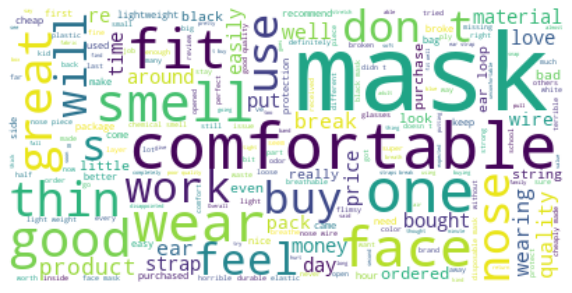

In [98]:
review_str = sample.content.str.cat()
wordcloud = WordCloud(background_color = 'white').generate(review_str)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [99]:
bad_review = sample[sample['rating'].isin([1,2])]
good_review = sample[sample['rating'].isin([4,5])]

bad_review_str = bad_review.title.str.cat()
good_review_str = good_review.title.str.cat()

print(bad_review_str)
print(good_review_str)

Do not purchase.Worst quality I've ordered from AmazonMASK BAG WAS WIDE OPEN. GROSS!!Smells like a skunk5 masks broke in a span of 5 hoursHorrible SmellUnpleasant odor, no way can be usedWorst masks I have ever worn!!!The worst do not buy the majority of the mask don’t have ear straps extremely bad quality !!!!Don’t buy!!!!DO NOT BUY!! AWFUL CHEMICAL SMELL and received opened returned packagePoor Quality: Ear loops break immediately!It had one job…Smells extremely toxic and wouldn’t recommend itTerrible. Do not buyContains Unkown ChemicalsDon't buy these masks!95% garbage.Been buying for over a year this last batch was awfulMasks Have Awful SmellNot goodAll Are Damaged !!Not Buying Again!!The worst product I've ever bought.Scratchy & make your face hot more than others I’ve usedPossibly a BAD batch???Do Not Buy!No Wire for Close Fit Around NoseNever have written a reviewThey smell like gasolineCheap and uselessBad chemical smellDownright dangerous masks!Fell apartPackage unsealedcomple

Text(0.5, 1.0, 'Bad Review')

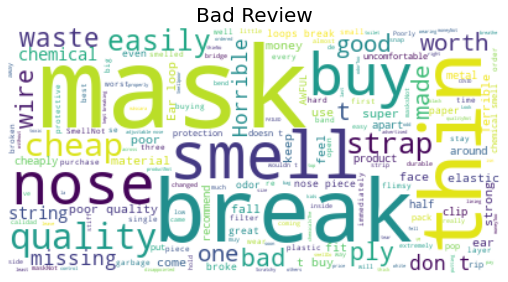

In [100]:
wordcloud_bad = WordCloud(background_color = 'white').generate(bad_review_str)
wordcloud_good = WordCloud(background_color = 'black').generate(good_review_str)

#plot
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_bad, interpolation = 'bilinear')
ax1.axis("off")
ax1.set_title('Bad Review', fontsize = 20)

Text(0.5, 1.0, 'Good Review')

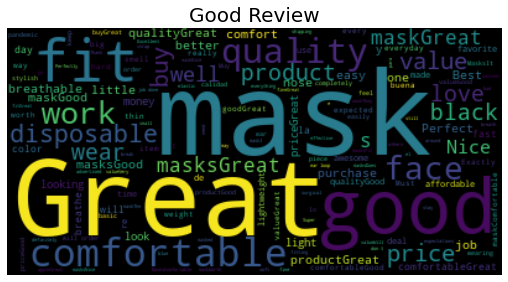

In [101]:
fig = plt.figure(figsize = (10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_good, interpolation = 'bilinear')
ax2.axis("off")
ax2.set_title('Good Review', fontsize = 20)

In [21]:
#Pre-processing text
! pip install textblob

In [22]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [23]:
df = pd.read_csv("./amazonDataset.csv",error_bad_lines=False)

In [24]:
lst_content = train['content'].tolist()
lst_title = train['title'].tolist()

print(lst_content)
print(lst_title)

['They smell horrible. I purchased them because it was a great deal but now I wish I had reviewed the reviews before purchasing.  I do not know how anyone loves these. I am thankful that I did not spend a lot of money for them.', 'Smells weird !!', "Ordered several different kind of masks I usually get multiple layered disposable but I went with these because I was trying to save a couple bucks.Not worth it not worth it at all all I did was completely waste money, these are not usable!!! Now I'm going to have to pay double to get the more expensive ones that I like these were complete 100% out of pocket waste. I might as well just set my money on fire.There's open spaces at my cheeks and under my chin or germs can just fly out into people's faces it does not protect at all. I am vaccinated but I can feel my breath pouring out of the sides and under the chin area of this so I know it is not keeping other people safe from my germs.I went and wasted 10 more dollars on cloth masks to go ov

In [25]:
test_content = test['content'].tolist()

print(test_content)

['Like the product a lot!', 'Everything', 'The straps breaks easily. Especially when you are putting it on.', 'The Straps break easily', 'Long lasting material for price.', 'I use this product for everyday use and I love the color and how lightweight it is.', 'Half of the masks were missing an ear loop.  Would not purchase again.', 'they didn’t fit or protect well very cheap material', 'Lightweight and fit well', "I hate it. Too big, Most of them were crumbled. It's not comfortable at all!!", 'The product is very thin and they all break soon you use them don’t purchase', 'They are black ....', 'you can use them more than one time.', 'I like the color, the shape but little too long stretch holders', 'The nose piece comes off too easily', 'Perfect!', 'The media could not be loaded.', 'These masks are a great deal for the price point', '10/10 will not buy again!', 'They are inexpensive and comfortable for one day use.', 'overall very good masks', 'The mask came broken', 'like the mask', '

In [26]:
#convert to lowercase
lst_content = [str(item).lower() for item in lst_content]
lst_title = [str(item).lower() for item in lst_title]

print(lst_content)
print(lst_title)

['they smell horrible. i purchased them because it was a great deal but now i wish i had reviewed the reviews before purchasing.  i do not know how anyone loves these. i am thankful that i did not spend a lot of money for them.', 'smells weird !!', "ordered several different kind of masks i usually get multiple layered disposable but i went with these because i was trying to save a couple bucks.not worth it not worth it at all all i did was completely waste money, these are not usable!!! now i'm going to have to pay double to get the more expensive ones that i like these were complete 100% out of pocket waste. i might as well just set my money on fire.there's open spaces at my cheeks and under my chin or germs can just fly out into people's faces it does not protect at all. i am vaccinated but i can feel my breath pouring out of the sides and under the chin area of this so i know it is not keeping other people safe from my germs.i went and wasted 10 more dollars on cloth masks to go ov

In [27]:
test_content = [str(item).lower() for item in test_content]

print(test_content)

['like the product a lot!', 'everything', 'the straps breaks easily. especially when you are putting it on.', 'the straps break easily', 'long lasting material for price.', 'i use this product for everyday use and i love the color and how lightweight it is.', 'half of the masks were missing an ear loop.  would not purchase again.', 'they didn’t fit or protect well very cheap material', 'lightweight and fit well', "i hate it. too big, most of them were crumbled. it's not comfortable at all!!", 'the product is very thin and they all break soon you use them don’t purchase', 'they are black ....', 'you can use them more than one time.', 'i like the color, the shape but little too long stretch holders', 'the nose piece comes off too easily', 'perfect!', 'the media could not be loaded.', 'these masks are a great deal for the price point', '10/10 will not buy again!', 'they are inexpensive and comfortable for one day use.', 'overall very good masks', 'the mask came broken', 'like the mask', '

In [28]:
#remove the lower casing and the punctuations in the text
#The [] specifies a "group or set" of characters. the ^ directly after the [ specifies not to match that group or set.
#\s is whitespace characters, namely spacebar and tab.
#\w is alphanumeric characters.

df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['content'] = df['content'].str.replace('[^\w\s]', "")
df.content.head()

0    they smell horrible i purchased them because i...
1                                        smells weird 
2    ordered several different kind of masks i usua...
3    ive been struggling with wearing a mask throug...
4    it very comfortable and light weight its worth...
Name: content, dtype: object

In [29]:
#remove stopword
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.snowball import SnowballStemmer

In [30]:
stop_words = set(stopwords.words('english'))

for i in range(len(lst_content)):
    content_filtered = []
    title_filtered = []
    content_word_tokens = []
    title_word_tokens = []
    
    content_word_tokens = lst_content[i].split()
    title_word_tokens = lst_title[i].split()
    
    for r in content_word_tokens:
        if not r in stop_words:
            content_filtered.append(r)
    lst_content[i] = ' '.join(content_filtered)
    
    for r in title_word_tokens:
        if not r in stop_words:
            title_filtered.append(r)
    lst_title[i] = ' '.join(title_filtered)

In [31]:
for i in range(len(test_content)):
    content_filtered = []
    content_word_tokens = []
    
    content_word_tokens = test_content[i].split()
    
    for r in content_word_tokens:
        if not r in stop_words:
            content_filtered.append(r)
    test_content[i] = ' '.join(content_filtered)

In [32]:
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x .split()
                                                      if x not in stop))
df.content.head(300)

0      smell horrible purchased great deal wish revie...
1                                           smells weird
2      ordered several different kind masks usually g...
3      ive struggling wearing mask 12 hour shifts hos...
4             comfortable light weight worth every penny
                             ...                        
295    masks way big daughter says make look like duc...
296    100 masks pack bendable nose piece glued one s...
297    masks garbage dont waste money see cheaper one...
298    happy masks easy wear durable elastic ears don...
299    saw lot people mention horrible smelled mine s...
Name: content, Length: 300, dtype: object

In [33]:
# #remove html tag
import re

def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

for i in range (len(lst_content)):
    lst_content[i] = striphtml(lst_content[i])
    lst_title[i] = striphtml(lst_title[i])

In [34]:
for i in range (len(test_content)):
    test_content[i] = striphtml(test_content[i])

In [35]:
lst_content[0:5]

['smell horrible. purchased great deal wish reviewed reviews purchasing. know anyone loves these. thankful spend lot money them.',
 'smells weird !!',
 "ordered several different kind masks usually get multiple layered disposable went trying save couple bucks.not worth worth completely waste money, usable!!! i'm going pay double get expensive ones like complete 100% pocket waste. might well set money fire.there's open spaces cheeks chin germs fly people's faces protect all. vaccinated feel breath pouring sides chin area know keeping people safe germs.i went wasted 10 dollars cloth masks go keep sealed around face luck it, got really bad cloth masks.when open container paying attention cloth masks got go top wire nose keep masks either. still feel breath going sides neck.these disposable masks wire help bunch masks checked wire covers like half one part there's like wire remnants something. worst quality ever got feel like robbed. literally feel like took money right hands gave unusable

In [36]:
#remove special chracters
for i in range(len(lst_content)):
    lst_content[i] = re.sub(r'[^A-Za-z]+', ' ', lst_content[i])
    lst_title[i] = re.sub(r'[^A-Za-z]+', ' ', lst_title[i])

In [37]:
for i in range(len(test_content)):
    test_content[i] = re.sub(r'[^A-Za-z]+', ' ', test_content[i])

In [38]:
lst_content[0:5]

['smell horrible purchased great deal wish reviewed reviews purchasing know anyone loves these thankful spend lot money them ',
 'smells weird ',
 'ordered several different kind masks usually get multiple layered disposable went trying save couple bucks not worth worth completely waste money usable i m going pay double get expensive ones like complete pocket waste might well set money fire there s open spaces cheeks chin germs fly people s faces protect all vaccinated feel breath pouring sides chin area know keeping people safe germs i went wasted dollars cloth masks go keep sealed around face luck it got really bad cloth masks when open container paying attention cloth masks got go top wire nose keep masks either still feel breath going sides neck these disposable masks wire help bunch masks checked wire covers like half one part there s like wire remnants something worst quality ever got feel like robbed literally feel like took money right hands gave unusable garbage ',
 'i ve stru

In [39]:
#lemmatization
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
df.content.head()

0    smell horrible purchased great deal wish revie...
1                                          smell weird
2    ordered several different kind mask usually ge...
3    ive struggling wearing mask 12 hour shift hosp...
4           comfortable light weight worth every penny
Name: content, dtype: object

In [40]:
#snowball stemming
stemmer = SnowballStemmer('english')

for i in range(len(lst_content)):
    content_filtered = []
    title_filtered = []
    content_word_tokens = []
    title_word_tokens = []
    
    content_word_tokens = lst_content[i].split()
    title_word_tokens = lst_title[i].split()
    
    for r in content_word_tokens:
        if not r in stop_words:
            content_filtered.append(str(stemmer.stem(r)))
    lst_content[i] = ' '.join(content_filtered)
    
    for r in title_word_tokens:
        title_filtered.append(str(stemmer.stem(r)))
    lst_title[i] = ' '.join(title_filtered)

In [41]:
for i in range(len(test_content)):
    content_filtered = []
    content_word_tokens = []
    
    content_word_tokens = test_content[i].split()
    
    for r in content_word_tokens:
        if not r in stop_words:
            content_filtered.append(str(stemmer.stem(r)))
    test_content[i] = ' '.join(content_filtered)

In [42]:
lst_content[0:20]

['smell horribl purchas great deal wish review review purchas know anyon love thank spend lot money',
 'smell weird',
 'order sever differ kind mask usual get multipl layer dispos went tri save coupl buck worth worth complet wast money usabl go pay doubl get expens one like complet pocket wast might well set money fire open space cheek chin germ fli peopl face protect vaccin feel breath pour side chin area know keep peopl safe germ went wast dollar cloth mask go keep seal around face luck got realli bad cloth mask open contain pay attent cloth mask got go top wire nose keep mask either still feel breath go side neck dispos mask wire help bunch mask check wire cover like half one part like wire remnant someth worst qualiti ever got feel like rob liter feel like took money right hand gave unus garbag',
 'struggl wear mask hour shift hospit hard breath one brand give headach coupl hour mani break hour get fluff mouth rest shift mask elimin problem comfort wear mask twelv hour straight iss

In [43]:
lst_content[0:20]

['smell horribl purchas great deal wish review review purchas know anyon love thank spend lot money',
 'smell weird',
 'order sever differ kind mask usual get multipl layer dispos went tri save coupl buck worth worth complet wast money usabl go pay doubl get expens one like complet pocket wast might well set money fire open space cheek chin germ fli peopl face protect vaccin feel breath pour side chin area know keep peopl safe germ went wast dollar cloth mask go keep seal around face luck got realli bad cloth mask open contain pay attent cloth mask got go top wire nose keep mask either still feel breath go side neck dispos mask wire help bunch mask check wire cover like half one part like wire remnant someth worst qualiti ever got feel like rob liter feel like took money right hand gave unus garbag',
 'struggl wear mask hour shift hospit hard breath one brand give headach coupl hour mani break hour get fluff mouth rest shift mask elimin problem comfort wear mask twelv hour straight iss

In [44]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r"",string)


for i in range (len(lst_content)):
    lst_content[i] = remove_emoji(lst_content[i])
    
lst_content[0:20]

['smell horribl purchas great deal wish review review purchas know anyon love thank spend lot money',
 'smell weird',
 'order sever differ kind mask usual get multipl layer dispos went tri save coupl buck worth worth complet wast money usabl go pay doubl get expens one like complet pocket wast might well set money fire open space cheek chin germ fli peopl face protect vaccin feel breath pour side chin area know keep peopl safe germ went wast dollar cloth mask go keep seal around face luck got realli bad cloth mask open contain pay attent cloth mask got go top wire nose keep mask either still feel breath go side neck dispos mask wire help bunch mask check wire cover like half one part like wire remnant someth worst qualiti ever got feel like rob liter feel like took money right hand gave unus garbag',
 'struggl wear mask hour shift hospit hard breath one brand give headach coupl hour mani break hour get fluff mouth rest shift mask elimin problem comfort wear mask twelv hour straight iss

In [45]:
#vectorization for dataset 
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
vect = CountVectorizer()
x_train_dtm = vect.fit_transform(lst_content)

In [47]:
x_train_dtm

<2234x2157 sparse matrix of type '<class 'numpy.int64'>'
	with 22737 stored elements in Compressed Sparse Row format>

In [48]:
x_test_dtm = vect.transform(test_content)
x_test_dtm

<779x2157 sparse matrix of type '<class 'numpy.int64'>'
	with 4097 stored elements in Compressed Sparse Row format>

In [49]:
#multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [50]:
#train model with using x_train_dtm
%time nb.fit(x_train_dtm, train.rating)

Wall time: 3 ms


MultinomialNB()

In [51]:
#to use to do the predict class for x_test_dtm
y_pred_class_nb = nb.predict(x_test_dtm)

In [52]:
#calculation
from sklearn import metrics

metrics.accuracy_score(test.rating, y_pred_class_nb)

0.8870346598202824

In [53]:
con_metrics_nb = metrics.confusion_matrix(test.rating, y_pred_class_nb)
con_metrics_nb

array([[164,  26],
       [ 62, 527]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix: Naive Bayes')

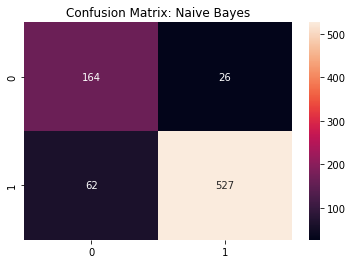

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metrics_nb, annot = True, fmt = 'd')
plt.title("Confusion Matrix: Naive Bayes")

In [55]:
from sklearn.metrics import classification_report

print(classification_report(test.rating, y_pred_class_nb))

              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79       190
         1.0       0.95      0.89      0.92       589

    accuracy                           0.89       779
   macro avg       0.84      0.88      0.86       779
weighted avg       0.90      0.89      0.89       779



In [56]:
#calculate AUC 
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test.rating, y_pred_class_nb)
print(metrics.auc(false_positive_rate, true_positive_rate))

auc_nb = metrics.roc_auc_score(test.rating, y_pred_class_nb)
print(auc_nb)

0.8789473684210527
0.8789473684210527


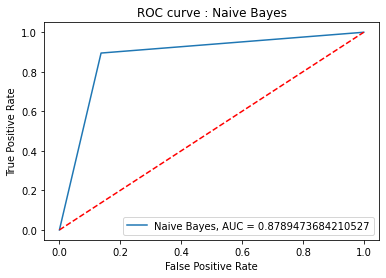

In [57]:
plt.plot(false_positive_rate, true_positive_rate, label = "Naive Bayes, AUC = " + str(auc_nb))
plt.plot([0,1], [0,1],'r--')
plt.title('ROC curve : Naive Bayes')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
nb.predict(["love"])